# **NumPy & Pandas**: The tools of the trade

---

# Overview

1. About NumPy
    1. Importing
    * Basic data structure overview
    * Brief object creation tutorial
    * Indexing/Exploring/Manipulating
2. About Pandas
    1. Importing
    * Basic data structure overview
    * Brief object creation tutorial
    * Indexing/Exploring/Manipulating
    * I/O in Pandas
3. Data visualization
4. Closing

# NumPy: Numeric Python ('numb-pie')

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1200px-NumPy_logo.svg.png" alt="NumPy logo" style="width:300">

NumPy (np) is the premier Python package for scientific computing. The reason np is so powerful is its N-dimensional array object.

np is a *lower*-level numerical computing library. This means that, while you can use it directly, most of its power comes from the packages built on top of np:
* Pandas (*Pan*els *Da*tas): the R Killer
* Scikit-learn (machine learning)
* Scikit-image (image processing)
* OpenCV (computer vision)
* more...

___

## Importing `np`

### The convention: aliasing numpy to np
```python
import numpy as np
```

The cell below will import numpy, but as many of you may not have the complete build, it is set up to install `np` and `pandas` if `np` is not present.

In [1]:
try:
    import numpy as np
except ImportError:
    import conda.cli as cc
    cc.main(*'conda install -y numpy pandas matplotlib seaborn'.split())
    import numpy as np

## `np` Data Structures

<img src="https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png" alt="data structures" style="width:200">

* 1D array := vector
* 2D array := array or matrix
* ND array 

### What you know now:

In [2]:
# lists
some_list = [1,2,3]

# Remember, id() just gives us the 
# memory location of the object
for item in some_list:
    print(id(item))

140019706495168
140019706495200
140019706495232


### How `np` does it:

![](https://image.slidesharecdn.com/numpytalksiam-110305000848-phpapp01/95/numpy-talk-at-siam-17-728.jpg?cb=1299283822)

---

### The basics

In [3]:
# From Python list
arr = np.array([1,2,3])

Every array has these basic attributes:
* `shape`: array dimension
* `size`: Number of elements in array
* `ndim`: Number of array dimension (`len(arr.size)`)
* `dtype`: Data-type of the array
* `T`: The transpose of the array

In [4]:
# Playing with attributes
arr.shape

(3,)

In [5]:
arr.size

3

In [6]:
arr.ndim

1

In [7]:
arr

array([1, 2, 3])

In [8]:
arr.T

array([1, 2, 3])

In [13]:
# 2D array
arr_2d = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [14]:
arr_2d

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [15]:
arr_2d.size

12

In [16]:
arr_2d.shape

(4, 3)

In [19]:
arr_2dT = arr_2d.T

In [18]:
arr_2d

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [20]:
# Reshaping
arr_2d = arr_2d.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [21]:
arr_2d

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [24]:
# 3D array
arr_3d = np.zeros((3,4,5))

In [25]:
arr_3d.shape

(3, 4, 5)

#### Indexing

In [28]:
# Naive Python
a_list = [[1,2,3], [4,5,6]]
a_list[0][1]

2

In [26]:
# Position-based
arr_2d[0,1]

2

In [30]:
# Slicing
arr_2d[0,:2]

array([4, 5, 6])

In [33]:
# Boolean
arr_2d[arr_2d < 5] 

array([1, 2, 3, 4])

#### Time Check

In [34]:
a = list(range(int(1e6)))
b = np.array(a)

In [35]:
%%timeit
sum(a)

7.24 ms ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
np.sum(b)

603 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


---

## Creating data

Since `list(range(n))` is a common prototyping setup, `np` makes it a little easier with:

In [37]:
# arange
np.arange(int(1e6))

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [41]:
np.linspace(1, 10, 1000)

array([ 1.        ,  1.00900901,  1.01801802,  1.02702703,  1.03603604,
        1.04504505,  1.05405405,  1.06306306,  1.07207207,  1.08108108,
        1.09009009,  1.0990991 ,  1.10810811,  1.11711712,  1.12612613,
        1.13513514,  1.14414414,  1.15315315,  1.16216216,  1.17117117,
        1.18018018,  1.18918919,  1.1981982 ,  1.20720721,  1.21621622,
        1.22522523,  1.23423423,  1.24324324,  1.25225225,  1.26126126,
        1.27027027,  1.27927928,  1.28828829,  1.2972973 ,  1.30630631,
        1.31531532,  1.32432432,  1.33333333,  1.34234234,  1.35135135,
        1.36036036,  1.36936937,  1.37837838,  1.38738739,  1.3963964 ,
        1.40540541,  1.41441441,  1.42342342,  1.43243243,  1.44144144,
        1.45045045,  1.45945946,  1.46846847,  1.47747748,  1.48648649,
        1.4954955 ,  1.5045045 ,  1.51351351,  1.52252252,  1.53153153,
        1.54054054,  1.54954955,  1.55855856,  1.56756757,  1.57657658,
        1.58558559,  1.59459459,  1.6036036 ,  1.61261261,  1.62

Remember `makeTable`?

In [42]:
numRows = 3
numCols = 4

In [43]:
make_table = np.random.standard_normal((3,4))

In [44]:
make_table

array([[ 0.3958987 ,  0.2819023 ,  1.45638894, -0.0197812 ],
       [ 0.02614808,  0.35094866, -0.7296895 ,  2.58078069],
       [-0.75832528, -0.23590702, -0.63920457, -0.18315473]])

Look [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) for more random sampling methods.

### Pre-allocating

Unlike Python `list`s, `np` does better if the array size is pre-allocated. All this means is that you tell `np` how big of an array you want *before* you do anything to it.

#### Standard Python

In [45]:
%%timeit
a = []
for i in range(int(1e6)):
    a.append(i)

99.8 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### `np.append`

In [46]:
%%timeit
a = np.array([])
for i in range(int(1e6)):
    np.append(a, i)

3.51 s ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Pre-allocated `np`

In [47]:
%%timeit
a = np.empty(int(1e6), dtype=np.int64)
for i in range(int(1e6)):
    a[i] = i

92.3 ms ± 6.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

## Broadcasting

In [48]:
# Naive Python sum of two lists
a = [1, 2, 3]
b = [4, 5, 6]
for i in range(len(a)):
    print(a[i]+b[i])

5
7
9


![](https://image.slidesharecdn.com/numpytalksiam-110305000848-phpapp01/95/numpy-talk-at-siam-27-728.jpg?cb=1299283822)

In [49]:
np.array([1,2,3]).shape

(3,)

In [55]:
arr_2d.T + np.array([1,2,3,4])

array([[ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [50]:
print(arr_2d)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [54]:
arr_2d + np.array([1,2,3,4]).reshape(4,1)

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12],
       [14, 15, 16]])

---

![](https://pandas.pydata.org/_static/pandas_logo.png)

# About Pandas

## What is pandas?

[Pandas](https://pandas.pydata.org/) is a high-performance library that makes familiar data structures, like `data.frame` from R, and appropriate data analysis tools available to Python users...Python master race.

## How does pandas work?

Pandas is built off of [Numpy](http://www.numpy.org/), and therefore leverages Numpy's C-level speed for its data analysis.

However, there is one caveat...whereas Numpy can only make data structures of a single type, Pandas can use many types. Think of a SQL table, where each column can be whatever type you want it to be, so long as every item in the column is that same type.

## Why use pandas?

1. Data munging/wrangling: the cleaning and preprocessing of data
2. Loading data into memory from disparate data formats (SQL, CSV, TSV, JSON)
2. Tired of R, but still like `data.frame`
3. Don't know R
4. Want to forget R

# Importing

Probably the easiest step. Because pandas is built off of numpy, it is always usefull to import numpy at the same time. However, this isn't necessary.

In [56]:
import numpy as np
import numpy.random as nr
import pandas as pd

/root/miniconda3/envs/prototyping/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/miniconda3/envs/prototyping/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Additionally, we will be doing some very basic data visualization. This means we need a plotting library. The following cell shows the standard convention for importing [matplotlib](https://matplotlib.org/#) and how to use notebook `magic` to allow the plots to show in the notebook when they are generated.

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

`poss_labels` below is just a quick way for me to name things.

In [58]:
poss_labels = nr.choice([word.strip() for word in open('./datasets/words_alpha.txt')], size=(1000,), replace=False)

Alternately, once can use the `gen_lab` function to create *m* number for *n*-length labels

In [59]:
import string

def gen_lab(n, m=1):
    '''generate a m number of n-length random labels from string.ascii_lowercase'''
    labels = []
    for i in range(m):
        out = nr.choice(list(string.ascii_lowercase), 2)
        labels.append(''.join(out))
    return labels

# Basic data structure overview

For a more thorough dive into the different data structure, feel free to read [this](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) documentation

The data structures of interest are:
1. `pd.Series`
2. `pd.DataFrame`

## Series

**One-dimensional** labeled array (or vector) 

```python
# Initialization Syntax
series = pd.Series(data, index, dtype) 
```

* **`data`** : what is going inside the Series (array-like, dict, or scalar value)
* **`index`**: row identifiers (doesn't have to be unique--think foreign key. Defaults to row number)
* **`dytpe`**: numpy/python based data types

## DataFrame

**Multi-dimensional** labeled data structure with columns of *potentially* different types

```python
# Initialization Syntax
df = pd.DataFrame(data, index, columns, dtype)
```

* **`data`** : what is going inside the DataFrame (numpy ndarray (structured or homogeneous), dict, or DataFrame)
* **`index`** : row identifiers (doesn't have to be unique--think foreign key. Defaults to row number)
* **`columns`** : column identifiers
* **`dtype`** : numpy/python based data types

# Brief object creation tutorial

## Series

### From a Python list

In [60]:
data_list = list(range(2,10))
data_list

[2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
a = pd.Series(data_list)
a

0    2
1    3
2    4
3    5
4    6
5    7
6    8
7    9
dtype: int64

------
Below is going to look like some crazy, but bear with me. Due to pandas having a very rich API, even a simple `Series` has a large ammount of attributes and methods. That means I want to clean it up and just look at attributes *only*, so I use the thing below to do that. </br> </br>
Let's look at the attributes of **`a`** to see what it can do...

In [62]:
dir(a)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

In [63]:
import types

def get_attr_list(obj):
    attributes = []
    for i in dir(obj):
        if not i.startswith('_'):
            if not isinstance(getattr(obj,i), types.MethodType):
                attributes.append(i)
    return attributes

In [64]:
get_attr_list(a)

/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.base is deprecated and will be removed in a future version
  import sys
/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys
/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.flags is deprecated and will be removed in a future version
  import sys
/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.itemsize is deprecated and will be removed in a future version
  import sys
/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stab

['T',
 'at',
 'axes',
 'base',
 'data',
 'dtype',
 'dtypes',
 'empty',
 'flags',
 'ftype',
 'ftypes',
 'hasnans',
 'iat',
 'iloc',
 'imag',
 'index',
 'is_monotonic',
 'is_monotonic_decreasing',
 'is_monotonic_increasing',
 'is_unique',
 'itemsize',
 'ix',
 'loc',
 'name',
 'nbytes',
 'ndim',
 'plot',
 'real',
 'shape',
 'size',
 'strides',
 'values']

We can quickly generate additional data structures by using the attributes of existing data structures (so long as they are appropriate)

----

### Assigning a more helpful index

In [65]:
pd.Series(a, index=nr.choice(poss_labels, size=(a.size)))

podolite       NaN
phellum        NaN
sussex         NaN
hab            NaN
tactlessness   NaN
cashbook       NaN
housemating    NaN
celemines      NaN
dtype: float64

In [66]:
b = pd.Series(a.values, index=nr.choice(poss_labels, size=(a.size)))
b

bucketful       2
unjeering       3
siliciophite    4
unimitated      5
feldspars       6
intradermic     7
larnakes        8
spermicidal     9
dtype: int64

### From dictionary

In [69]:
data_dict = dict(zip(b.index, a.values))
data_dict

{'bucketful': 2,
 'unjeering': 3,
 'siliciophite': 4,
 'unimitated': 5,
 'feldspars': 6,
 'intradermic': 7,
 'larnakes': 8,
 'spermicidal': 9}

In [70]:
c = pd.Series(data_dict)
c

bucketful       2
unjeering       3
siliciophite    4
unimitated      5
feldspars       6
intradermic     7
larnakes        8
spermicidal     9
dtype: int64

### Setting the dtype

In [67]:
d = pd.Series(b, dtype=np.float16)
d

bucketful       2.0
unjeering       3.0
siliciophite    4.0
unimitated      5.0
feldspars       6.0
intradermic     7.0
larnakes        8.0
spermicidal     9.0
dtype: float16

### From numpy array

In [71]:
d = pd.Series(nr.randn(len(c.index)), index=c.index, dtype=np.float64)
d

bucketful      -1.166186
unjeering       1.577219
siliciophite   -0.744617
unimitated     -0.378484
feldspars      -1.440774
intradermic     2.333273
larnakes       -2.185011
spermicidal     0.771838
dtype: float64

### Naming the series

In [72]:
e = pd.Series(d, name='Foo')
e

bucketful      -1.166186
unjeering       1.577219
siliciophite   -0.744617
unimitated     -0.378484
feldspars      -1.440774
intradermic     2.333273
larnakes       -2.185011
spermicidal     0.771838
Name: Foo, dtype: float64

## DataFrame

DataFrames work much in the same way as `pd.Series`. Just like `np.ndarray`, it is just an extension (with some caveats) into a different dimensionality.

### From list

In [73]:
in_dat = [data_list, data_list[::-1]]
in_dat

[[2, 3, 4, 5, 6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2]]

In [74]:
dfa = pd.DataFrame(in_dat)
dfa

,0,1,2,3,4,5,6,7
0,2,3,4,5,6,7,8,9
1,9,8,7,6,5,4,3,2


----
Again, let's look at the attributes of a dataframe

In [75]:
get_attr_list(dfa)

/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


['T',
 'at',
 'axes',
 'columns',
 'dtypes',
 'empty',
 'ftypes',
 'iat',
 'iloc',
 'index',
 'ix',
 'loc',
 'ndim',
 'plot',
 'shape',
 'size',
 'style',
 'values']

### Add an index

In [76]:
dfb = pd.DataFrame(dfa.values, index=list(string.ascii_lowercase[:len(in_dat)]))
dfb

,0,1,2,3,4,5,6,7
a,2,3,4,5,6,7,8,9
b,9,8,7,6,5,4,3,2


### Add column names

Because this is a dataframe, we can add both and index ***and*** column names

In [77]:
dfc = pd.DataFrame(dfb.values, index=dfb.index, columns=nr.choice(poss_labels, size=(dfb.shape[1])))
dfc

,neurochemist,unmarriable,buttinskies,achenial,uninebriate,warmish,pincushions,untonality
a,2,3,4,5,6,7,8,9
b,9,8,7,6,5,4,3,2


### Add a dtype

In [81]:
dfd = pd.DataFrame(dfc, dtype=np.float16)
dfd

,neurochemist,unmarriable,buttinskies,achenial,uninebriate,warmish,pincushions,untonality
a,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
b,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0


In [82]:
dfd.dtypes

neurochemist    float16
unmarriable     float16
buttinskies     float16
achenial        float16
uninebriate     float16
warmish         float16
pincushions     float16
untonality      float16
dtype: object

As seen, if you set a `dtype` for the `DataFrame`, you set it for ***all*** of the elements. However, you can always set the column dtypes individually. We will look at this later.

### From a dictionary

In [83]:
two_d_dict = dict(zip(dfd.index,in_dat))
two_d_dict

{'a': [2, 3, 4, 5, 6, 7, 8, 9], 'b': [9, 8, 7, 6, 5, 4, 3, 2]}

In [84]:
dfe = pd.DataFrame(two_d_dict, index = dfd.columns).T
dfe

,neurochemist,unmarriable,buttinskies,achenial,uninebriate,warmish,pincushions,untonality
a,2,3,4,5,6,7,8,9
b,9,8,7,6,5,4,3,2


### From numpy array

In [85]:
arr_1 = nr.randint(0, 100, (3,4))
arr_1

array([[86, 83, 87, 63],
       [23, 71, 87, 78],
       [46, 26, 21,  9]])

In [86]:
dff = pd.DataFrame(arr_1, index = list(string.ascii_lowercase[:arr_1.shape[0]]), columns = gen_lab(2, arr_1.shape[1]))
dff

,ju,dy,rd,ni
a,86,83,87,63
b,23,71,87,78
c,46,26,21,9


### From `pd.Series`

#### Row-wise (`append`)

In [87]:
# Remember pd.Series a?
a = a.rename('original')
print(a)
a_rev = pd.Series(a.values[::-1], name='reveresed', dtype=np.float16)
a_rev

0    2
1    3
2    4
3    5
4    6
5    7
6    8
7    9
Name: original, dtype: int64


0    9.0
1    8.0
2    7.0
3    6.0
4    5.0
5    4.0
6    3.0
7    2.0
Name: reveresed, dtype: float16

In [88]:
# Create the original DataFrame
df_rows = pd.DataFrame(a).T
df_rows

,0,1,2,3,4,5,6,7
original,2,3,4,5,6,7,8,9


In [89]:
# Now add on a row
df_rows.append(a_rev)

,0,1,2,3,4,5,6,7
original,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
reveresed,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0


#### Column-wise (`join`/`concat`)

In [90]:
df_columns = pd.DataFrame(nr.randn(3,4))
df_columns.columns = [gen_lab(2, 4)]
df_columns

,hp,yi,gy,eo
0,1.105431,-1.819520,0.498486,0.501821
1,-0.452983,0.898272,0.490863,-1.231453
2,-0.353909,-1.854483,0.501776,-0.445332


#### `join`

In [91]:
p = df_columns.join(a_rev)

In [92]:
p

,"(hp,)","(yi,)","(gy,)","(eo,)",reveresed
0,1.105431,-1.819520,0.498486,0.501821,9.0
1,-0.452983,0.898272,0.490863,-1.231453,8.0
2,-0.353909,-1.854483,0.501776,-0.445332,7.0


In [93]:
p.dtypes

(hp,)        float64
(yi,)        float64
(gy,)        float64
(eo,)        float64
reveresed    float16
dtype: object

#### `concat`

In [94]:
# Same size
pd.concat([df_columns, a_rev[:3]], axis=1)

,"(hp,)","(yi,)","(gy,)","(eo,)",reveresed
0,1.105431,-1.819520,0.498486,0.501821,9.0
1,-0.452983,0.898272,0.490863,-1.231453,8.0
2,-0.353909,-1.854483,0.501776,-0.445332,7.0


In [95]:
# Unequal size
pd.concat([df_columns, a_rev], axis=1)

,"(hp,)","(yi,)","(gy,)","(eo,)",reveresed
0,1.105431,-1.819520,0.498486,0.501821,9.0
1,-0.452983,0.898272,0.490863,-1.231453,8.0
2,-0.353909,-1.854483,0.501776,-0.445332,7.0
3,NaN,NaN,NaN,NaN,6.0
4,NaN,NaN,NaN,NaN,5.0
5,NaN,NaN,NaN,NaN,4.0
6,NaN,NaN,NaN,NaN,3.0
7,NaN,NaN,NaN,NaN,2.0


# I/O in Pandas

One of the biggest reasons people use pandas is to bring data in without having to mess around with file I/O, delimiters, and type conversion. Pandas, is a one-stop shop for a lot of this.

### CSV Files

#### Input

In [96]:
pd.read_csv('./datasets/real_estate.csv')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


#### Output

You can also, just as easily, save your `DataFrames`

In [97]:
dfd.to_csv('./datasets/some_file.csv')

**NOTE: **You can always put a filename in the function above to have it save to file...I just didn't feel like it.

### Excel Files

#### Input

In [ ]:
pd.read_excel('./datasets/sample_excel.xlsx').head()

#### Output

In [ ]:
excel_writer = pd.ExcelWriter('./datasets/excel_output.xlsx')
dfd.to_excel(excel_writer, 'Sheet1')

### TSV Files

#### Input

In [ ]:
pd.read_table('./datasets/sample_tsv.tsv').tail()

### Clipboard

#### Copy

In [ ]:
dfd.to_clipboard()

In [ ]:
# Paste here


#### Paste

In [ ]:
pd.read_clipboard()

### SQLite

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('./datasets/flights.db')
sql_df = pd.read_sql('SELECT * FROM airlines LIMIT 10;', conn)
sql_df

---

# Indexing/Exploring/Manipulating in Pandas

While standard `'[]'` bracket slicing can be used, as well as `'.'` methods,

there are also 2 pandas-specific methods for indexing:
1. `.loc` -> primarily label-based
2. `.iloc` -> primarily integer-based

Additionally, Pandas allows you to do random sampling from the dataframe

In [98]:
# Load up some data to work with
index_example = pd.read_csv('./datasets/real_estate.csv')
small_idx = index_example.head(10)
small_idx

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


## `'[]'` slicing on a `pd.DataFrame` gives us a slice of **rows**

In [99]:
small_idx[:3]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


## `'.'` operators and a column name can select a **specific named** column

In [100]:
small_idx.street

0                       3526 HIGH ST
1                        51 OMAHA CT
2                     2796 BRANCH ST
3                   2805 JANETTE WAY
4                    6001 MCMAHON DR
5                 5828 PEPPERMILL CT
6                6048 OGDEN NASH WAY
7                      2561 19TH AVE
8    11150 TRINITY RIVER DR Unit 114
9                       7325 10TH ST
Name: street, dtype: object

`'.'` operator selected columns are now just a `pd.Series` and can be `'[]'` sliced on further

In [101]:
small_idx.street[:3]

0      3526 HIGH ST
1       51 OMAHA CT
2    2796 BRANCH ST
Name: street, dtype: object

However, if it is a named column that doesn't fit well as a `'.'` name, you can use `'[]'` selection as well

In [102]:
small_idx['street'][:3]

0      3526 HIGH ST
1       51 OMAHA CT
2    2796 BRANCH ST
Name: street, dtype: object

Furthermore, you can name your rows, and select them too

In [103]:
# Give our table index some string values
small_idx.index = gen_lab(2, len(small_idx))
small_idx[:10]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
bt,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
lv,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
me,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
tb,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
oz,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
nn,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
rw,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
td,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
qq,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
rt,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [104]:
small_idx['lv':'nn']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
lv,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
me,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
tb,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
oz,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
nn,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813


By using this, we can now select specific items/columns/rows of a dataframe and make changes to them

In [ ]:
# Silence SettingWithCopy warning
pd.set_option('mode.chained_assignment', None)
small_idx.sq__ft.dtype

In [ ]:
small_idx.sq__ft = small_idx.sq__ft.astype(np.float16)

In [ ]:
small_idx.sq__ft.dtype

## Selection by label: the `.loc` method

```python
# .loc syntax
small_idx.loc[row indexer, column indexer]
```

#### a slice of specific items (based on label)

In [106]:
small_idx.loc['lv':'nn', 'street']

lv           51 OMAHA CT
me        2796 BRANCH ST
tb      2805 JANETTE WAY
oz       6001 MCMAHON DR
nn    5828 PEPPERMILL CT
Name: street, dtype: object

#### A list of desired items (based on label)

In [ ]:
small_idx.loc[['dx', 'sp'], 'street']

#### Boolean indexing

In [107]:
small_idx.loc[small_idx.sq__ft > 1000]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
lv,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
nn,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
rw,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
td,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
rt,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


## Selection by position: the `.iloc` method

#### a slice of specific items (based on position)

In [108]:
small_idx.iloc[:3,2]

bt    95838
lv    95823
me    95815
Name: zip, dtype: int64

#### a slice of specific items (based on position)

In [109]:
small_idx.iloc[:5,[0,1,6,9]]

,street,city,sq__ft,price
bt,3526 HIGH ST,SACRAMENTO,836,59222
lv,51 OMAHA CT,SACRAMENTO,1167,68212
me,2796 BRANCH ST,SACRAMENTO,796,68880
tb,2805 JANETTE WAY,SACRAMENTO,852,69307
oz,6001 MCMAHON DR,SACRAMENTO,797,81900


In [110]:
small_idx.iloc[:5, small_idx.columns == 'sq__ft']

,sq__ft
bt,836
lv,1167
me,796
tb,852
oz,797


## Quick Exploration of the data

In [111]:
index_example.sq__ft.describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [112]:
print('MAD: {}'.format(index_example.price.mad()))
print('SUM: {}'.format(index_example.price.aggregate(sum)))
print('Any missing values: {}'.format(index_example.price.hasnans))

MAD: 103452.16956891441
SUM: 230632100
Any missing values: False


## Object Manipulation

In [113]:
small_idx.loc[small_idx.sq__ft > 1000, 'price'] = 0 
small_idx.loc[small_idx.sq__ft > 1000]

/root/miniconda3/envs/prototyping/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
lv,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,0,38.478902,-121.431028
nn,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,0,38.662595,-121.327813
rw,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,0,38.681659,-121.351705
td,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,0,38.535092,-121.481367
rt,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,0,38.700909,-121.442979


# Data Visualization

Pandas works off of a plotting library called `matplotlib` by default. You can easily start visualizing dataframs and series just by a simple command.

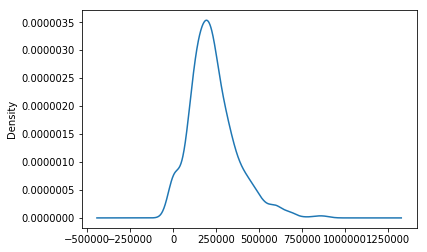

In [114]:
index_example.price.plot(kind='density')

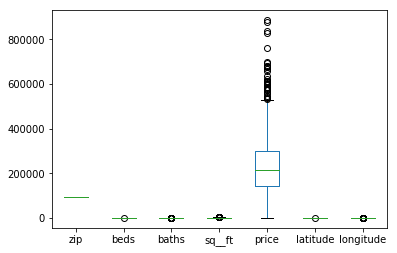

In [115]:
index_example.plot.box()